https://colab.research.google.com/drive/1oRPJ4-eQoBglQ8khrEWURPUqlQUER1Ge?usp=sharing

# **Keras**

## **Data preparation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### **Classification data**

In [19]:
path_to_file = '/content/drive/MyDrive/ОмГТУ/6 семестр/Анализ данных /datasets/occupancy_detection_preprocessed.csv'
classification_df = pd.read_csv(path_to_file, index_col=0)

classification_df = classification_df.drop(['date'], axis=1)

X = classification_df.iloc[:, :-1].values
y = classification_df.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **Neural networks in keras**

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

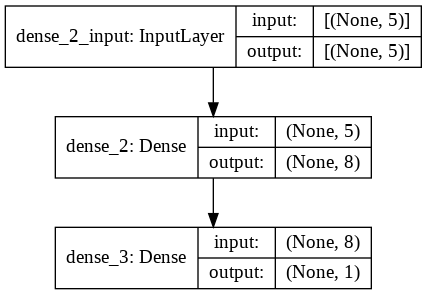

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, 
           show_layer_names=True)

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
%%time
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.3454 - accuracy: 0.8706
Epoch 2/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0615 - accuracy: 0.9858
Epoch 3/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0473 - accuracy: 0.9885
Epoch 4/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9868
Epoch 5/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0474 - accuracy: 0.9888
Epoch 6/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0422 - accuracy: 0.9904
Epoch 7/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0417 - accuracy: 0.9894
Epoch 8/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0470 - accuracy: 0.9875
Epoch 9/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9882
Epoch 10/150
1645/1645 [==============================] - 2s 1ms/step - l

In [27]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')

129/129 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9915
Model accuracy: 99.15%


**Try to increase accuracy by add more hidden layers**

In [28]:
model_with_more_hidden_layers = Sequential()

model_with_more_hidden_layers.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model_with_more_hidden_layers.add(Dense(12, activation='relu'))
model_with_more_hidden_layers.add(Dense(16, activation='relu'))
model_with_more_hidden_layers.add(Dense(1, activation='sigmoid'))

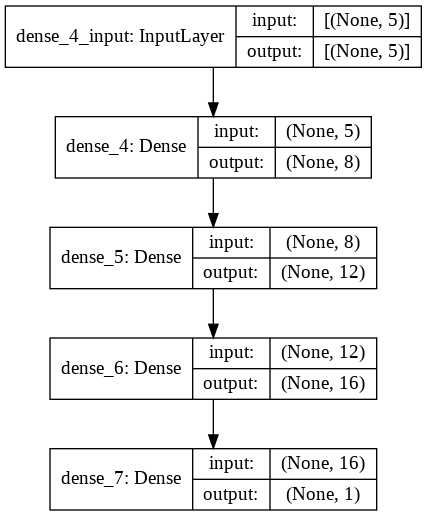

In [29]:
plot_model(model_with_more_hidden_layers, to_file='model_with_more_hidden_layers_plot.png', 
           show_shapes=True, show_layer_names=True)

In [30]:
model_with_more_hidden_layers.compile(loss='binary_crossentropy', 
                                      optimizer='adam', metrics=['accuracy'])

In [31]:
%%time
model_with_more_hidden_layers.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1645/1645 [==============================] - 3s 1ms/step - loss: 0.2238 - accuracy: 0.9181
Epoch 2/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0451 - accuracy: 0.9879
Epoch 3/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0456 - accuracy: 0.9877
Epoch 4/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0388 - accuracy: 0.9886
Epoch 5/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0406 - accuracy: 0.9891
Epoch 6/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0385 - accuracy: 0.9893
Epoch 7/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9894
Epoch 8/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0454 - accuracy: 0.9867
Epoch 9/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.9885
Epoch 10/150
1645/1645 [==============================] - 2s 1ms/step - l

In [32]:
_, accuracy = model_with_more_hidden_layers.evaluate(X_test, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')

129/129 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9917
Model accuracy: 99.17%


**Accuracy increased by 0.02%, not bad :)**

**Try to use SGD optimizer in model**

In [33]:
model_with_more_hidden_layers.compile(loss='binary_crossentropy', optimizer='SGD',
                                      metrics=['accuracy'])

In [34]:
%%time
model_with_more_hidden_layers.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1645/1645 [==============================] - 3s 1ms/step - loss: 0.0253 - accuracy: 0.9910
Epoch 2/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9924
Epoch 3/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0243 - accuracy: 0.9914
Epoch 4/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 5/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 6/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0213 - accuracy: 0.9921
Epoch 7/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0215 - accuracy: 0.9934
Epoch 8/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0249 - accuracy: 0.9915
Epoch 9/150
1645/1645 [==============================] - 2s 1ms/step - loss: 0.0227 - accuracy: 0.9925
Epoch 10/150
1645/1645 [==============================] - 2s 1ms/step - l

In [35]:
_, accuracy = model_with_more_hidden_layers.evaluate(X_test, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')

129/129 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9917
Model accuracy: 99.17%


## **Saving model with best accuracy**

In [44]:
model_with_more_hidden_layers.save('/content/drive/MyDrive/ОмГТУ/6 семестр/Анализ данных /keras/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ОмГТУ/6 семестр/Анализ данных /keras/my_model/assets


## **Comparison with decision tree classifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [38]:
%%time
dtc.fit(X_train, y_train)

CPU times: user 21.6 ms, sys: 1.9 ms, total: 23.5 ms
Wall time: 24.9 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
dtc_accuracy = dtc.score(X_test, y_test)
print(f'DTC accuracy: {dtc_accuracy * 100:.2f}%')

DTC accuracy: 99.12%


## **Conclusion**

On this dataset sequential neural network get slightly accuracy increase while spending more time on training.